# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Hairunissa Rizka Utiarahman
- **Email:** m012d4kx3083@bangkit.academy
- **ID Dicoding:** hairunissa_rizka_utiarahman_m012d4kx3083_rym2

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda dari waktu ke waktu?
- Bagaimana pola musiman dalam penggunaan sepeda?
- Bagaimana cuaca mempengaruhi penggunaan sepeda?
- Bagaimana distribusi penggunaan sepeda pada hari kerja vs. hari libur?
- Bagaimana perbedaan dalam pola penggunaan sepeda antara jam kerja dan jam non-kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour = pd.read_csv("/hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data




1.   Menilai Dataset **day**








*   Tipe data dan jumlah data



In [16]:
print(df_day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


Note: Tidak ada masalah atau perbedaan dengan jumlah data pada setiap colum, namun pada colum dteday terdapat kesalahan tipe data (object) yang harusnya tipenya datetime.



*    **Missing values**



In [17]:
print(df_day.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Note: Bedasarkan hasil diatas tidak terdapat missing values dari dataset df_day



*   Duplikasi data



In [20]:
print('Jumlah duplikasi df_day:', df_day.duplicated().sum())

Jumlah duplikasi df_day: 0


Note: Ketika menjalankan kode di atas, tidak ditemukan bahwa terdapat data yang terduplikat.



*   Descriptive



In [21]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


2. Menilai dataset hour




*   Tipe data dan jumlah data



In [22]:
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Notes: Tidak ada masalah atau perbedaan dengan jumlah data pada setiap colum, namun pada colum dteday terdapat kesalahan tipe data (object) yang harusnya tipenya datetime.



*   Missing value



In [23]:
print(df_hour.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Note: Bedasarkan hasil diatas tidak terdapat missing values dari dataset df_hour



*   Duplikasi data



In [25]:
print("Jumlah duplikasi df_hour:", df_hour.duplicated().sum())

Jumlah duplikasi df_hour: 0


Note: Ketika menjalankan kode di atas, tidak ditemukan bahwa terdapat data yang terduplikat.



*   Descriptive



In [26]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Bedasarkan proses diatas kita telah berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan. Berikut merupakan perbaikannya.



*    Memperbaiki kesalahan tipe data



In [27]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])



*   Kode di atas akan mengubah tipe data pada menjadi datetime. Untuk memastikan hal ini berjalan sesuai harapan, periksa kembali tipe data tersebut menggunakan method info().



In [31]:
df_day.info()
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)



*   Korelasi antara variabel numerik



In [54]:
correlation = df_day[['temp', 'cnt']].corr()
print(correlation)

          temp       cnt
temp  1.000000  0.627494
cnt   0.627494  1.000000




*   Rata-Rata Penggunaan Sepeda per Bulan



In [52]:
monthly_average = df_day.groupby('mnth')['cnt'].mean()
print("Rata-Rata Penggunaan Sepeda per Bulan:")
print(monthly_average)

Rata-Rata Penggunaan Sepeda per Bulan:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64




* Penggunaan Sepeda berdasarkan Kondisi Cuaca



In [55]:
weather_effect = df_day.groupby('weathersit')['cnt'].mean()
print("\nRata-Rata Penggunaan Sepeda berdasarkan Kondisi Cuaca:")
print(weather_effect)


Rata-Rata Penggunaan Sepeda berdasarkan Kondisi Cuaca:
weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64




* Distribusi Penggunaan Sepeda pada Hari Kerja vs. Hari Libur


In [56]:
workingday_distribution = df_day.groupby('workingday')['cnt'].mean()
print("\nRata-Rata Penggunaan Sepeda pada Hari Kerja vs. Hari Libur:")
print(workingday_distribution)


Rata-Rata Penggunaan Sepeda pada Hari Kerja vs. Hari Libur:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64




*  Penggunaan Sepeda antara Jam Kerja dan Jam Non-Kerja


In [57]:
hourly_usage_diff = df_hour.groupby(['workingday', 'hr'])['cnt'].mean().unstack()
print("\nPerbedaan Rata-Rata Penggunaan Sepeda antara Jam Kerja dan Jam Non-Kerja:")
print(hourly_usage_diff)


Perbedaan Rata-Rata Penggunaan Sepeda antara Jam Kerja dan Jam Non-Kerja:
hr                0          1          2          3         4          5   \
workingday                                                                   
0           90.80000  69.508696  53.171053  25.775330  8.264317   8.689189   
1           36.78629  16.552632   8.683778   4.942553  5.429787  24.913131   

hr                  6           7           8           9   ...          14  \
workingday                                                  ...               
0            18.742358   43.406926  105.653680  171.623377  ...  364.645022   
1           102.500000  290.612903  477.006048  241.518145  ...  183.572289   

hr                  15          16          17          18          19  \
workingday                                                               
0           358.813853  352.727273  323.549784  281.056522  231.673913   
1           201.331325  293.122244  525.290581  492.226908  348.401606   

## Visualization & Explanatory Analysis

### 1. Bagaimana tren penggunaan sepeda dari waktu ke waktu?

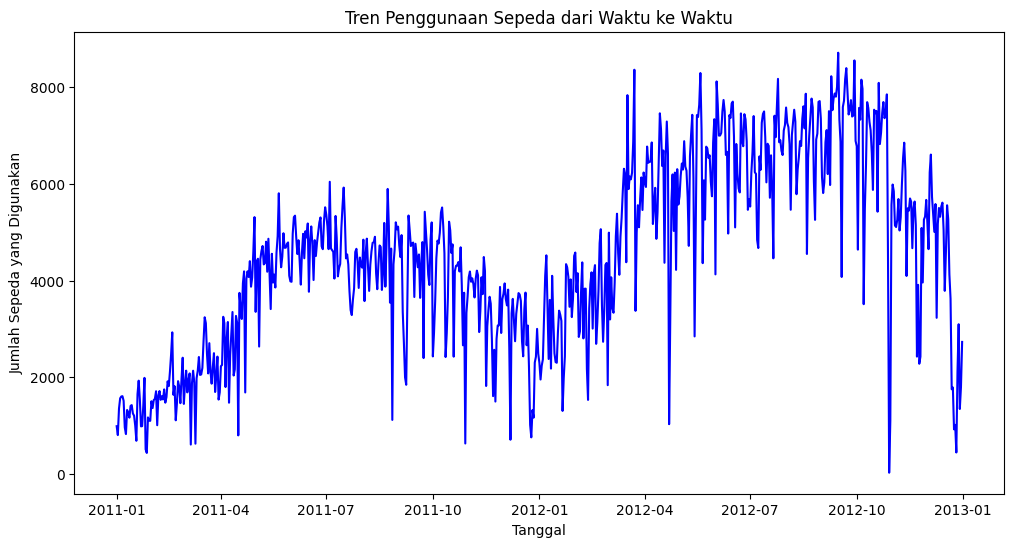

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df_day['dteday'], df_day['cnt'], color='b')
plt.title('Tren Penggunaan Sepeda dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()

Grafik menunjukkan tren penggunaan sepeda dari waktu ke waktu selama periode tertentu. Tampaknya terdapat fluktuasi dalam penggunaan sepeda, dengan puncak-puncak yang mungkin menunjukkan hari-hari dengan cuaca baik atau hari-hari libur.

### 2. Bagaimana pola musiman dalam penggunaan sepeda?

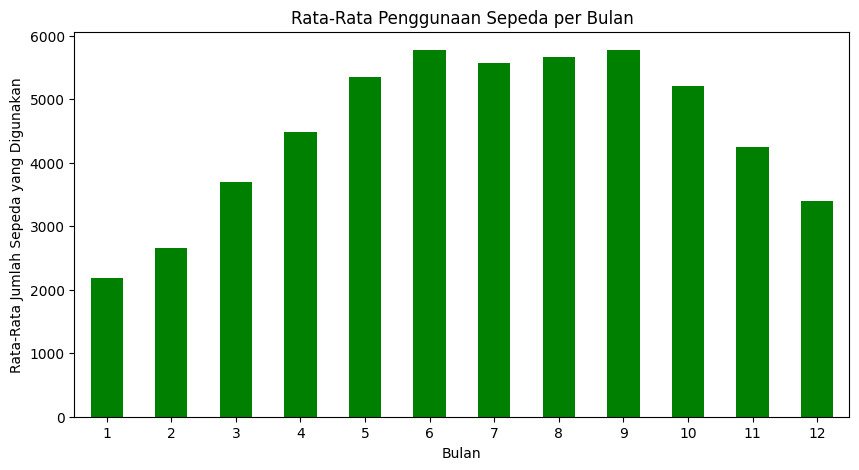

In [59]:
monthly_average = df_day.groupby('mnth')['cnt'].mean()
plt.figure(figsize=(10, 5))
monthly_average.plot(kind='bar', color='g')
plt.title('Rata-Rata Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Sepeda yang Digunakan')
plt.xticks(rotation=0)
plt.show()

Diagram batang menampilkan rata-rata penggunaan sepeda per bulan. Pola musiman terlihat jelas, di mana penggunaan sepeda cenderung lebih tinggi di musim panas dan lebih rendah di musim dingin.

### 3. Bagaimana cuaca mempengaruhi penggunaan sepeda?

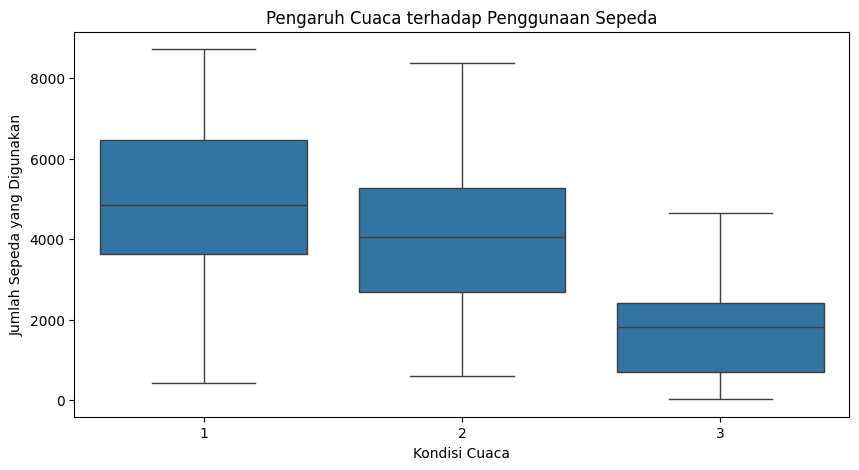

In [60]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='weathersit', y='cnt', data=df_day)
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()

Diagram kotak memperlihatkan pengaruh kondisi cuaca terhadap penggunaan sepeda. Tampaknya penggunaan sepeda lebih rendah saat kondisi cuaca buruk (tingkat 3 dan 4) dibandingkan saat cuaca cerah (tingkat 1 dan 2).

### 4. Bagaimana distribusi penggunaan sepeda pada hari kerja vs. hari libur?

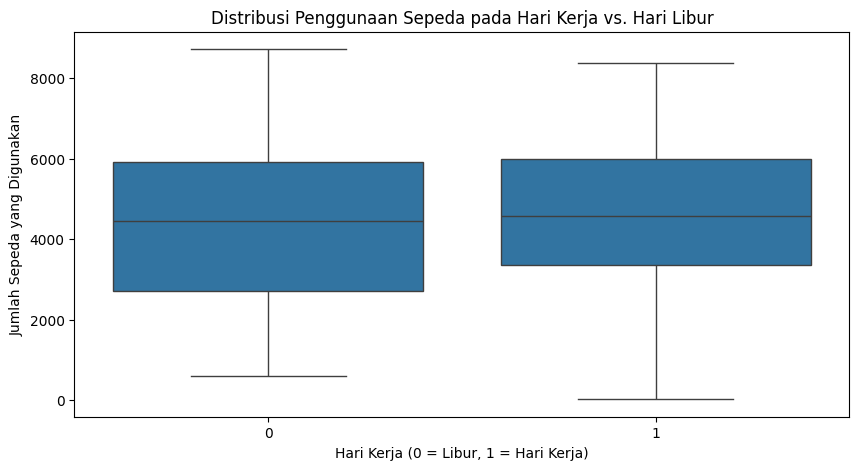

In [61]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='workingday', y='cnt', data=df_day)
plt.title('Distribusi Penggunaan Sepeda pada Hari Kerja vs. Hari Libur')
plt.xlabel('Hari Kerja (0 = Libur, 1 = Hari Kerja)')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.show()


Diagram kotak membandingkan distribusi penggunaan sepeda pada hari kerja dan hari libur. Terlihat bahwa median penggunaan sepeda sedikit lebih tinggi pada hari-hari kerja daripada hari libur.

### 5. Bagaimana perbedaan dalam pola penggunaan sepeda antara jam kerja dan jam non-kerja?

<ipython-input-62-4e736abffa73>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour, ci=None)


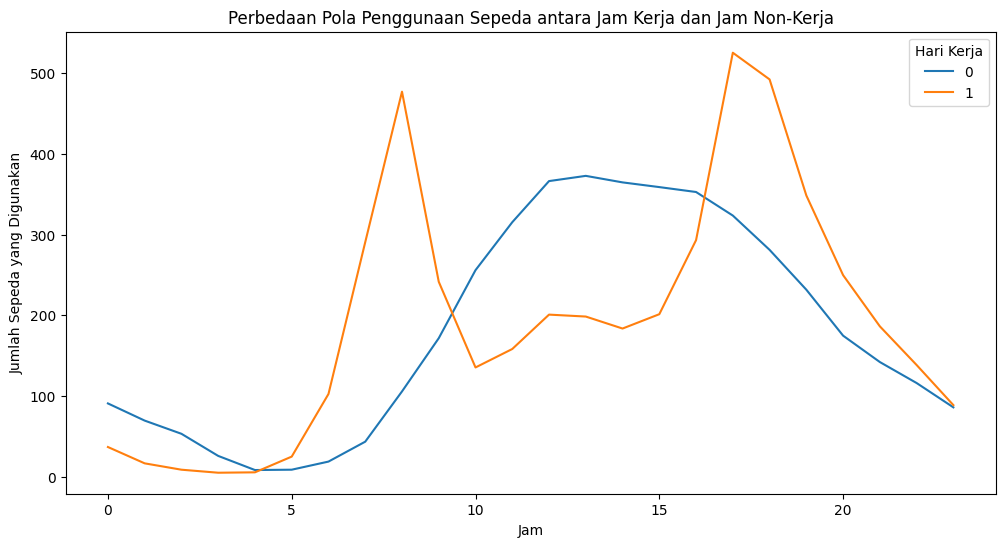

In [62]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='workingday', data=df_hour, ci=None)
plt.title('Perbedaan Pola Penggunaan Sepeda antara Jam Kerja dan Jam Non-Kerja')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sepeda yang Digunakan')
plt.legend(title='Hari Kerja')
plt.show()

Grafik garis menunjukkan perbedaan pola penggunaan sepeda antara jam kerja dan jam non-kerja. Selama jam kerja, penggunaan sepeda cenderung lebih tinggi pada pagi dan sore hari, sementara pada jam non-kerja, penggunaan sepeda cenderung lebih merata sepanjang hari. Ini mungkin menunjukkan bahwa penggunaan sepeda selama jam kerja lebih terkait dengan transportasi ke dan dari tempat kerja, sementara penggunaan sepeda pada jam non-kerja lebih terkait dengan rekreasi atau olahraga.

## Conclusion

- Tren Penggunaan Sepeda dari Waktu ke Waktu:
Terdapat fluktuasi dalam penggunaan sepeda dari waktu ke waktu, dengan puncak-puncak yang mungkin terjadi pada hari-hari dengan cuaca baik atau hari-hari libur.

- Pola Musiman dalam Penggunaan Sepeda:
Penggunaan sepeda menunjukkan pola musiman yang jelas, di mana penggunaan cenderung lebih tinggi di musim panas dan lebih rendah di musim dingin.

- Pengaruh Cuaca terhadap Penggunaan Sepeda:
Penggunaan sepeda cenderung lebih rendah saat kondisi cuaca buruk (tingkat 3 dan 4) dibandingkan saat cuaca cerah (tingkat 1 dan 2).

- Distribusi Penggunaan Sepeda pada Hari Kerja vs. Hari Libur:
Meskipun distribusi penggunaan sepeda memiliki median yang sedikit lebih tinggi pada hari-hari kerja daripada hari libur, perbedaannya tidak terlalu signifikan.

- Perbedaan dalam Pola Penggunaan Sepeda antara Jam Kerja dan Jam Non-Kerja:
Pola penggunaan sepeda berbeda antara jam kerja dan jam non-kerja, dengan penggunaan sepeda selama jam kerja yang lebih tinggi terjadi pada pagi dan sore hari, sementara pada jam non-kerja, penggunaan sepeda lebih merata sepanjang hari. Hal ini mungkin mencerminkan perbedaan dalam tujuan penggunaan sepeda antara kegiatan transportasi dan rekreasi.